In [13]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint

import pandas as pd
import numpy as np
import seaborn as sns

# Import the file made on WeatherPy
file = 'unemployment.csv'
unemployment = pd.DataFrame(pd.read_csv(file))
unemployment

,Unnamed: 0,Date,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
0,35,2018-01,686.0,6729.0,7798.0,4670.0,15718.6,5273.4,2772.0,8448.0,20328.0,23262.0,15437.0
1,34,2018-02,695.0,6840.0,7834.0,4687.0,15577.0,5260.4,2807.0,8476.0,20462.0,23620.0,15588.0
2,33,2018-03,704.0,6933.0,7870.0,4688.0,15610.8,5289.6,2814.0,8491.0,20566.0,23656.0,15818.0
3,32,2018-04,712.0,7129.0,7887.0,4693.0,15668.9,5301.5,2826.0,8502.0,20815.0,23698.0,16118.0
4,31,2018-05,722.0,7336.0,7915.0,4721.0,15772.6,5356.2,2832.0,8552.0,20914.0,23630.0,16524.0
5,30,2018-06,736.0,7497.0,8002.0,4772.0,15807.7,5392.0,2855.0,8646.0,21093.0,23416.0,17009.0
6,29,2018-07,740.0,7554.0,7987.0,4794.0,15804.0,5353.6,2861.0,8675.0,21086.0,23302.0,17107.0
7,28,2018-08,751.0,7586.0,8003.0,4798.0,15772.1,5392.7,2866.0,8674.0,21149.0,23405.0,17025.0
8,27,2018-09,746.0,7535.0,7989.0,4784.0,15606.6,5496.1,2833.0,8633.0,21115.0,23650.0,16462.0
9,26,2018-10,750.0,7557.0,8003.0,4768.0,15708.8,5554.9,2859.0,8658.0,21304.0,23963.0,16303.0


In [10]:
unemployment_data = unemployment.drop(columns=['Unnamed: 0', 'Date'])
unemployment_data.corr()


,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
Mining,1.000000,0.280998,0.876075,0.797027,0.650460,0.091603,0.882600,-0.056917,0.768539,0.608870,0.842294
Construction,0.280998,1.000000,0.465688,0.639663,0.431477,0.459756,0.347972,0.726450,0.642677,0.399832,0.528562
Durable_goods,0.876075,0.465688,1.000000,0.959962,0.843603,0.405277,0.921903,0.237377,0.921230,0.842715,0.970936
Non_durable_goods,0.797027,0.639663,0.959962,1.000000,0.873540,0.478517,0.879000,0.376811,0.959237,0.823971,0.971747
Retail,0.650460,0.431477,0.843603,0.873540,1.000000,0.511865,0.726446,0.165362,0.845202,0.741785,0.849306
Transportation,0.091603,0.459756,0.405277,0.478517,0.511865,1.000000,0.390992,0.758254,0.621653,0.703075,0.315795
Information,0.882600,0.347972,0.921903,0.879000,0.726446,0.390992,1.000000,0.228297,0.899762,0.847335,0.892651
Financial_activities,-0.056917,0.726450,0.237377,0.376811,0.165362,0.758254,0.228297,1.000000,0.471217,0.448115,0.214419
Professional_and_business_activities,0.768539,0.642677,0.921230,0.959237,0.845202,0.621653,0.899762,0.471217,1.000000,0.893887,0.907877
Education_and_health,0.608870,0.399832,0.842715,0.823971,0.741785,0.703075,0.847335,0.448115,0.893887,1.000000,0.788890


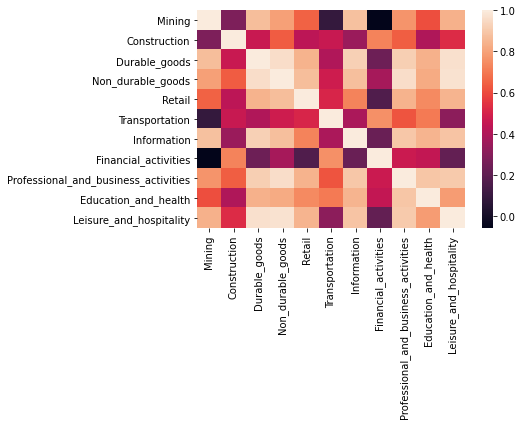

In [17]:
sns.heatmap(unemployment_data.corr())

Correlation for Industries on NO COVID Months


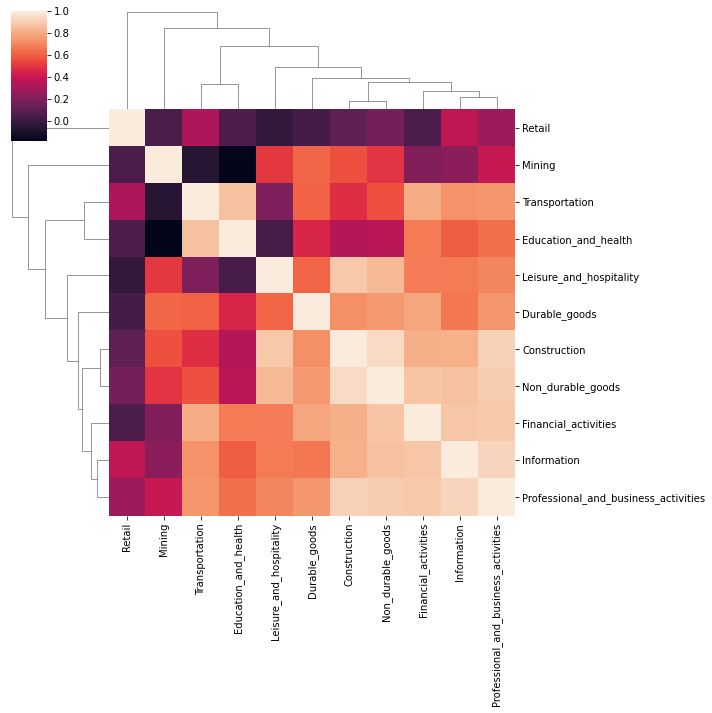

In [22]:
unemployment_nocovid = unemployment[unemployment['Unnamed: 0'] > 10] 
unemployment_nocovid = unemployment_nocovid.drop(columns=['Unnamed: 0', 'Date'])
unemployment_nocovid.corr()
g = sns.clustermap(unemployment_nocovid.corr())
print("Correlation for Industries on NO COVID Months")

Correlation for Industries on COVID Months


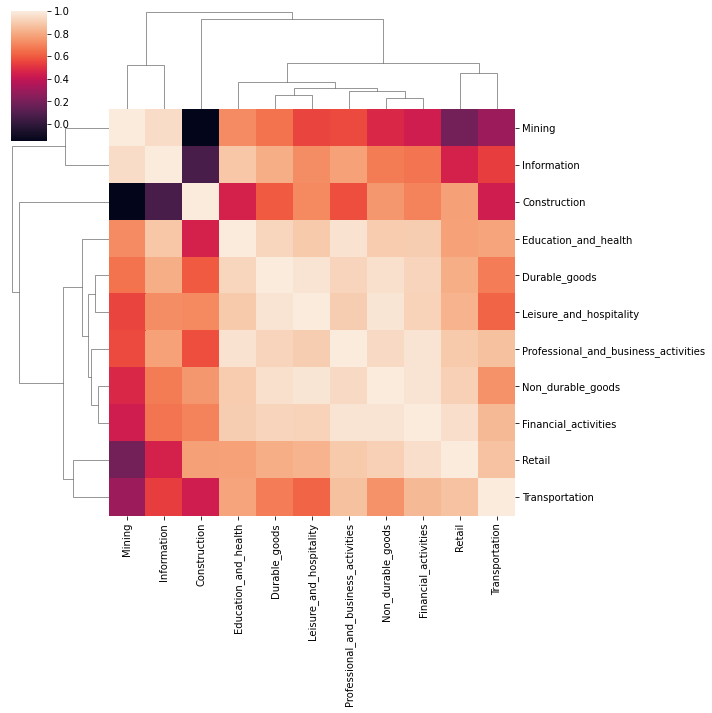

In [21]:
unemployment_covid = unemployment[unemployment['Unnamed: 0'] <= 10] 
unemployment_covid = unemployment_covid.drop(columns=['Unnamed: 0', 'Date'])
unemployment_covid.corr()
g = sns.clustermap(unemployment_covid.corr())
print("Correlation for Industries on COVID Months")